# MPA-MLF, Lab 6 - Feedforward Neural Networks with regularization techniques and hyperparameter tunning

## Exercise 1 - Classification of an images

The goal of this task will be to create Multi-layer perceptron model, that is able to recognize the  CIFAR10 dataset (https://www.cs.toronto.edu/~kriz/cifar.html). The CIFAR10 dataset consist of 60000 images with resolution of 32x32 pixels. There are 10 classes in total - *airplane*, *automobile*, *bird*, *cat*, *deer*, *dog*, *frog*, *horse*, *ship*, *truck*

These is an example of the dataset:

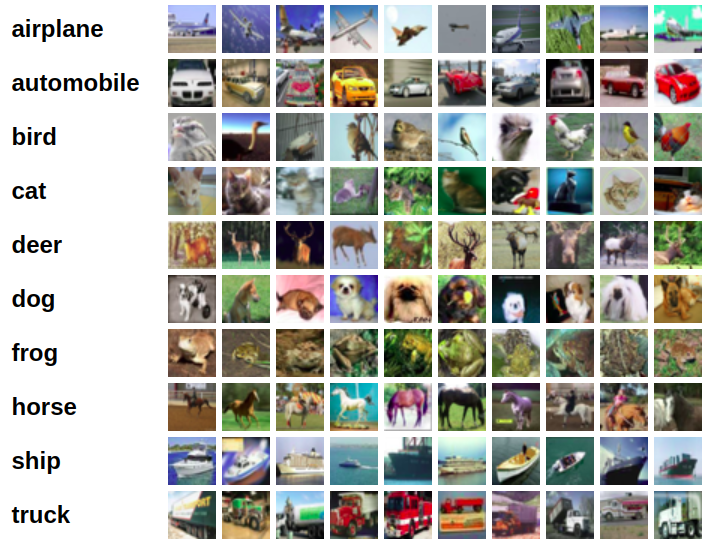

### 0. Import libraries

In [36]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import SGD, Adam
from keras.datasets import cifar10
from keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import cv2

font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

### 1. Load the Dataset
The dataset is already a part of the Keras library, so we can quickly load it using the following command

In [37]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

The following numbered labels represent the labels in the dataset:

In [38]:
labels = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

### 2. Data Examination

Fistly, lets have a look and the couple of images we have,

In [39]:
def display_random_images(x_data: np.array, y_data: np.array, count: int = 10) -> None:
  index = np.array(len(x_data))
  selected_ind = np.random.choice(index, count)

  selected_img = x_data[selected_ind]
  selected_labels_encoded = y_data[selected_ind]
  selected_labels = [labels[x[0]] for x in selected_labels_encoded]

  concat_img = np.concatenate(selected_img, axis=1)

  plt.figure(figsize=(20,10))
  plt.imshow(concat_img)

  for id_label, label in enumerate(selected_labels):
    plt.text((32/2) + 32*id_label - len(label), 32*(5/4), label)
  plt.axis('off')
  plt.show()



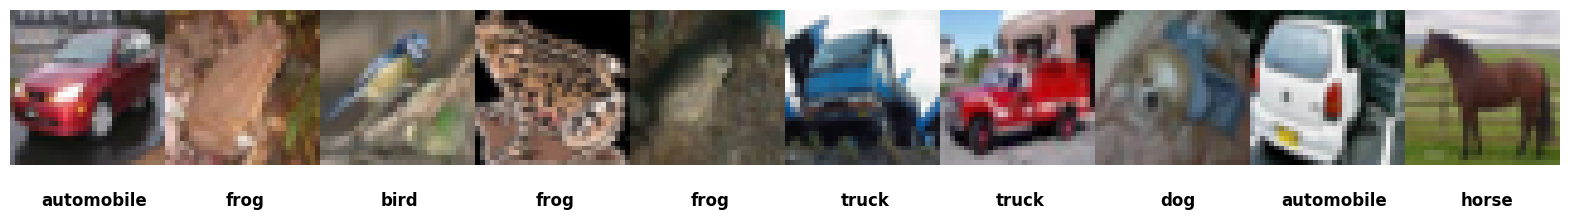

In [40]:
display_random_images(X_train, y_train)

In [41]:
#check the shape of image dataset

X_train.shape

(50000, 32, 32, 3)

In our dataset, we have 60000 images with 32x32 resolution. Each image has three channels (R, G, B). We have 50000 images for training and 10000 images for testing. Each channel for each image has values from 0 - 255, where each number represents the pixel intensity.
With the combination of intensities of R, G and B, you can display up to 16,777,216 different colours (256^3)

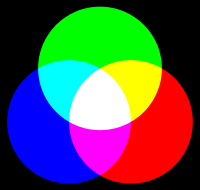

Here you can display each channel separately:

In [42]:
def display_channels_separately(image: np.array) -> None:

  plt.figure()
  fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10, 5))


  axs[0].imshow(image[:,:,0],cmap='Reds')
  axs[1].imshow(image[:,:,1],cmap='Blues')
  axs[2].imshow(image[:,:,2],cmap='Greens')

  axs[3].imshow(image)

  plt.show()

<Figure size 640x480 with 0 Axes>

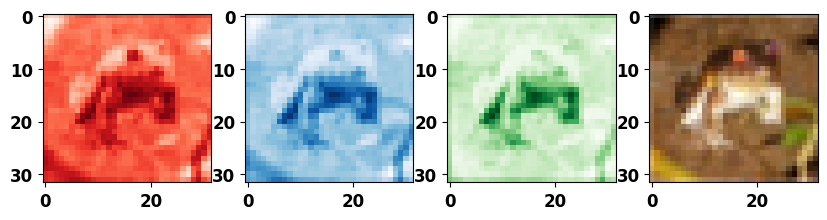

In [43]:
display_channels_separately(X_train[0])

### 3. Preprocessing of the images

For machine learning purposes, we have to preprocess our images. Firstly we need to scale our images, to scale intensity values from 0-1 (min-max scaling)

In [44]:
X_train_scaled = X_train.astype('float32') / 255.0

We need to one-hot-encode the labels in our ground truth variable as our second preprocessing.

In [45]:
y_train_encoded = to_categorical(y_train, num_classes=10)

### 4. Define the model architecture





In [46]:
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(10, activation='softmax'))

We will define *the Sequential* model as in our last exercise. This time we will use a different approach to determine the input layers. Instead of specifying the *input_dim* parameter in our first hidden layer, we will create a **Flatten** layer that takes our 32x32x3 image and reshapes it into 1x3072.

We will specify ten neurons in our output layer because we have 10 possible outputs and a **softmax** activation function that returns us a probability distribution over the classes. The class with the highest probability is typically chosen as the predicted class for a given input.

Check the description of our model:

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_8 (Dense)             (None, 512)               1573376   
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 10)               

The next step is to compile our model, we will use *categorical_crossentropy* as a loss function, *stochastic gradient descend* as an optimisation and we will be checking *the accuracy* metric.

In [48]:
optimizer = SGD(learning_rate = 0.01, momentum= 0.9) #changed the learning rate from 0.1 to 0.01 and add momentum
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [35]:
optimizer = Adam(learning_rate=0.001)  # Using Adam optimizer with default learning rate
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

### 5. Train the model

Our model will be trained in the same way as in our last pc_labs,

In [49]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [50]:
history = model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=256, validation_split = 0.2) #50 epochs instead of 20 and 256 batch size instead of 128

Epoch 1/50
157/157 [==============================] - 11s 67ms/step - loss: 3.4592 - accuracy: 0.2216 - val_loss: 3.2306 - val_accuracy: 0.3174
Epoch 2/50
157/157 [==============================] - 9s 54ms/step - loss: 3.1991 - accuracy: 0.3002 - val_loss: 3.0733 - val_accuracy: 0.3405
Epoch 3/50
157/157 [==============================] - 9s 58ms/step - loss: 3.0629 - accuracy: 0.3263 - val_loss: 2.9476 - val_accuracy: 0.3641
Epoch 4/50
157/157 [==============================] - 10s 63ms/step - loss: 2.9623 - accuracy: 0.3391 - val_loss: 2.8437 - val_accuracy: 0.3836
Epoch 5/50
157/157 [==============================] - 9s 60ms/step - loss: 2.8579 - accuracy: 0.3579 - val_loss: 2.7584 - val_accuracy: 0.3910
Epoch 6/50
157/157 [==============================] - 9s 56ms/step - loss: 2.7829 - accuracy: 0.3613 - val_loss: 2.7035 - val_accuracy: 0.3830
Epoch 7/50
157/157 [==============================] - 9s 60ms/step - loss: 2.7145 - accuracy: 0.3690 - val_loss: 2.6154 - val_accuracy: 0.39

### 6. Model evaluation

In [51]:
X_test = X_test.astype('float32') / 255.0
y_test_encoded = to_categorical(y_test, num_classes=10)

In [52]:
score = model.evaluate(X_test, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')

Test loss: 1.648049235343933
Test accuracy: 46.790000796318054 %


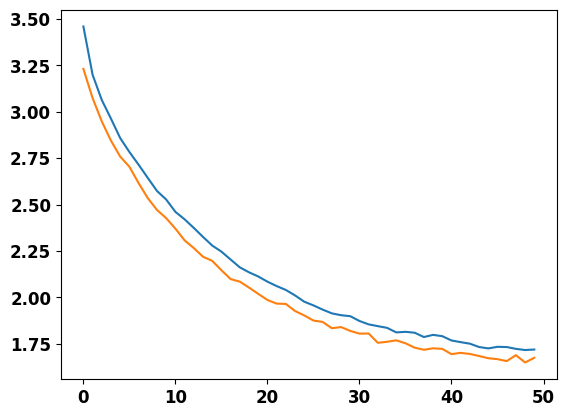

In [53]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

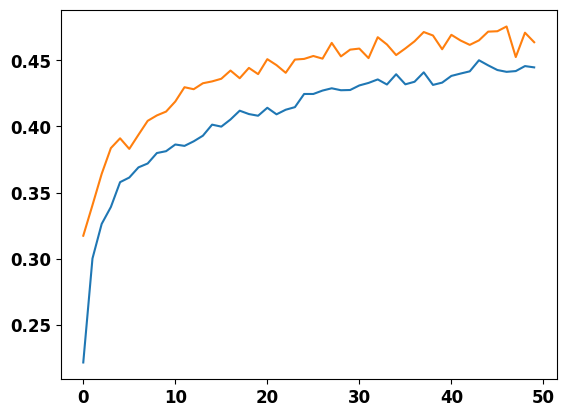

In [54]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

As you can see from the evaluation above, we was able to achive approx. 30% of an accuracy. In other word approx. 70% of an images we classified wrongly. That is really bad!

Lets check the best predictions from our model:

In [55]:
def show_the_best_predictions(model, x_test: np.array, y_test: np.array, n_of_pred: int = 10) -> None:
  mapping = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

  predictions = model.predict(x_test)
  y_test = y_test.reshape(1,-1)
  predictions_ind = np.argmax(predictions, axis=1)
  predictions_ind = predictions_ind.reshape(1, -1)

  corect_predictions = np.where(predictions_ind == y_test)

  rows_correct = corect_predictions[1]
  predictedtions_correct = predictions[rows_correct]
  target_correct = y_test[0][rows_correct]

  max_samples = predictions[rows_correct, target_correct]
  selected_images = x_test[rows_correct]
  sorted_ind = np.argsort(max_samples)[::-1]


  images = []
  prob = []
  labels = []


  for ind in range(n_of_pred):

    index = sorted_ind[ind]

    labels.append(target_correct[index])
    prob.append(max_samples[index])
    images.append(selected_images[index])

  plt.figure(figsize=(20,10))

  images = np.concatenate(np.asarray(images),axis=1)
  plt.imshow(images)
  for ins in range(n_of_pred):
    texts = '{}: \n{:.3f} %'.format(mapping[labels[ins]], prob[ins]*100)
    plt.text((32/2) + 32*ins - len(mapping[labels[ins]]), 32*(5/4), texts)

  plt.axis('off')
  plt.show()


313/313 [==============================] - 2s 6ms/step


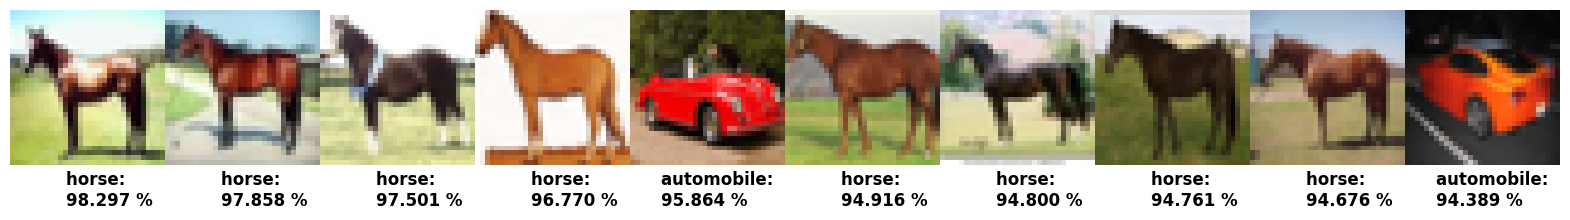

In [56]:
show_the_best_predictions(model, X_test, y_test)

### Task Description:

You task of this exercise would be to improve the model's performance to achieve better results in image classification task. There is no need to change the preprocessing of the dataset. There are possible way how to improve the models performance:

1. Hyperparameter tunning - change the hyperparameters so that the model will perform better. You can experiment with the following:
 - *changing the number of neurons in the hidden layer*
 - *changing the number of hidden layers*
 - *changing the activation functions*
 - *changing the learning rate*
 - *changing the optimizer* - So far, we have used only Gradient descend as our optimizer, but Keras offers other algorithms that can perform better - check the documentation!
 - *changing the number of learning epochs*\
 - *changing the batch size*

2. Regularization techniques - There are several regularization techniques that can improve the model's performance:
 - *Dropout* -  In the Keras lib. you can add *dropout layer* into your Sequential model using the following command  *model.add(Dropout(p))* where *p* is an hyperparameter that controls dropout probabily, typical values are 0.1 - 0.5.
 - *L1, L2 regularization* - In keras the regularization is applied for selected layers, there is an example how to add l2 regularization to an layer (for more details check the documnetation):  *model.add(Dense(64, activation='relu', input_dim=100, kernel_regularizer=l2(0.01)))*
 - *Early stopping* -  In Keras, you can use the EarlyStopping callback to implement early stopping in your model. *early_stopping = EarlyStopping(monitor='val_loss', patience=3)*,  *model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stopping])*


Try to make the highest testing accuracy possible. You can directly edit the code that is presented above, or you can copy everything into new cells. Please submit only the code with the best performance and briefly describe what approaches you have tried and what were the results

### WRITE YOUR DESCRIPTION IN THIS CELL ###

Initial results:



* Test loss: 2.03991436958313
* Test accuracy: 31.00000023841858 %

  



**Approach n°1:**
Changed the learning rate to 0.01 and added momentum to the optimizer.

my results :
* Test loss: 2.66239595413208
* Test accuracy: 10.000000149011612 %

I returned back to the 0.001 learning rate and no momentum

**Approach n°2:**
I increased the number of neurons in the hidden layers to 256 and 128. Then it didn't work that well so i added dropout layers after each hidden layer with dropout rates of 0.5 and 0.3 respectively.
And after this I changed activation function to 'relu' in hidden layers. And I added L2 regularization to the hidden layers with a regularization strength of 0.001.

my results :
* Test loss: 2.5250585079193115
* Test accuracy: 34.25999879837036 %


**Approach n°3:**
I increased the number of epochs to 50.

my results :
* Test loss: 2.916329860687256
* Test accuracy: 10.000000149011612 %

So now i'm trying to increase the batch size to 400 with an epoch of 10 :

my results :
* Test loss: 2.94279408454895
* Test accuracy: 10.000000149011612 %

now i will add an early stop of patiente 5 and change a bit the epoch (to 40) and the batch size (to 256) and change the learning rate to 0.01

my results :
* Test loss: 2.083956480026245
* Test accuracy: 44.5499986410141 %


**Approach n°4:**
I'm going to add a momentum to the optimizer
And increase the epochs to 50

* Test loss: 2.037062644958496
* Test accuracy: 45.93999981880188 %

**Approach n°5:**

Now i will add a layer of neural network (a relu) and using Adam optimizer

* Test loss: 1.6161437034606934
* Test accuracy: 48.30000102519989 %


### Voluntary task:
Implement one of the hyperparameter tunning algorithms discussed in the lecture, such as *Grid Search*, *Random Search* or more sophisticated ones. Some of these algorithms are already included in the Keras. Check the documentation